# Avaliação A2 - Previsão de Eleição

Com Base nos arquivos dos **dados eleitorais de 2020**, O Aluno deverá criar uma **Aplicação WEB** usando STREAMLIT para prever a situação do **Candidato a Vereador**, no município de **Campos de Goytacazes** (Eleito, Não eleito, Suplente)

## O mesmo deverá ser divido em duas partes

> 1a parte - Toda análise no Colab

> 2a parte - Aplicativo na WEB

- Idade
- Sexo
- Valor de Despesa
- Valor de receita
- Estado civil
- Raça
- Ocupação
- Partido
- Escolaridade

## Todos as etapas projeto deverá ser bem descrito/comentando.

Pontos que serão avaliados:

1. Obtenção da base dados
2. Analise exploratória dos dados
3. Gráficos de:
   - Idade
   - Sexo
   - Valor de Despesa
   - Valor de receita
   - Estado civil
   - Raça
   - Ocupação
   - Partido
   - Escolaridade
4. Preparação dos Dados
5. Arquitetura da Rede Neural
6. Acurácia do modelo
7. Previsão de dados
8. Layout da app Wev
9. Resultado no App WEB
   a. não é para treinar a rede novamente no Aplicativo

## Detalhes

- **3 Datasets:** https://www.tse.jus.br/eleicoes/estatisticas/repositorio-de-dados-eleitorais-1 > Prestação de contas eleitorais > 2020 > 3 Arquivos .zip
- **Aluno:** Plínio Larrubia Ferreira de Moura

## Observações:

1. Só será aceito as avaliações dos alunos que comparecerem a aula do dia 09 de dezembro de 2021.
2. A avaliação é individual.


## 0: Importação das bibliotecas


In [115]:
# Imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import tensorflow as tf
import zipfile
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


## 1: Carregamento e exploração da base de dados


### Ler base da dados


In [59]:
# from google.colab import drive
# drive.mount('/content/drive')


### Extraindo do `zip`, senão iria ficar muito grande


In [60]:
path = 'data/eleicao.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./data')
zip_object.close()


In [61]:
# candidatos = pd.read_csv('/content/drive/MyDrive/ic/Eleicao/consulta_cand_2020_RJ.csv', sep=';', encoding="ISO-8859-1")
# receitas = pd.read_csv('/content/drive/MyDrive/ic/Eleicao/receitas_candidatos_2020_RJ.csv', sep=';', encoding="ISO-8859-1")
# despesas = pd.read_csv('/content/drive/MyDrive/ic/Eleicao/despesas_contratadas_candidatos_2020_RJ.csv', sep=';', encoding="ISO-8859-1")

candidatos = pd.read_csv('data/Plinio Larrubia Ferreira de Moura - consulta_cand_2020_RJ.csv', sep=';', encoding="latin1")
receitas = pd.read_csv('data/Plinio Larrubia Ferreira de Moura - receitas_candidatos_2020_RJ.csv', sep=';', encoding="latin1")
despesas = pd.read_csv('data/Plinio Larrubia Ferreira de Moura - despesas_contratadas_candidatos_2020_RJ.csv', sep=';', encoding="latin1")


In [62]:
candidatos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26510 entries, 0 to 26509
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   SG_UE                         26510 non-null  int64  
 1   NM_UE                         26510 non-null  object 
 2   CD_CARGO                      26510 non-null  int64  
 3   DS_CARGO                      26510 non-null  object 
 4   NR_CANDIDATO                  26510 non-null  int64  
 5   NM_CANDIDATO                  26510 non-null  object 
 6   NM_URNA_CANDIDATO             26510 non-null  object 
 7   NR_CPF_CANDIDATO              26510 non-null  int64  
 8   NM_EMAIL                      26510 non-null  object 
 9   TP_AGREMIACAO                 26510 non-null  object 
 10  NR_PARTIDO                    26510 non-null  int64  
 11  SG_PARTIDO                    26510 non-null  object 
 12  NM_PARTIDO                    26510 non-null  object 
 13  D

In [63]:
receitas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111851 entries, 0 to 111850
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   DT_GERACAO                   111851 non-null  object
 1   HH_GERACAO                   111851 non-null  object
 2   ANO_ELEICAO                  111851 non-null  int64 
 3   CD_TIPO_ELEICAO              111851 non-null  int64 
 4   NM_TIPO_ELEICAO              111851 non-null  object
 5   CD_ELEICAO                   111851 non-null  int64 
 6   DS_ELEICAO                   111851 non-null  object
 7   DT_ELEICAO                   111851 non-null  object
 8   ST_TURNO                     111851 non-null  int64 
 9   TP_PRESTACAO_CONTAS          111851 non-null  object
 10  DT_PRESTACAO_CONTAS          111851 non-null  object
 11  SQ_PRESTADOR_CONTAS          111851 non-null  int64 
 12  SG_UF                        111851 non-null  object
 13  SG_UE         

In [64]:
despesas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230112 entries, 0 to 230111
Data columns (total 53 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   DT_GERACAO                 230112 non-null  object
 1   HH_GERACAO                 230112 non-null  object
 2   ANO_ELEICAO                230112 non-null  int64 
 3   CD_TIPO_ELEICAO            230112 non-null  int64 
 4   NM_TIPO_ELEICAO            230112 non-null  object
 5   CD_ELEICAO                 230112 non-null  int64 
 6   DS_ELEICAO                 230112 non-null  object
 7   DT_ELEICAO                 230112 non-null  object
 8   ST_TURNO                   230112 non-null  int64 
 9   TP_PRESTACAO_CONTAS        230112 non-null  object
 10  DT_PRESTACAO_CONTAS        230112 non-null  object
 11  SQ_PRESTADOR_CONTAS        230112 non-null  int64 
 12  SG_UF                      230112 non-null  object
 13  SG_UE                      230112 non-null  

In [65]:
candidatos.columns


Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NM_URNA_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DS_COMPOSICAO_COLIGACAO', 'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE',
       'DS_GENERO', 'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA',
       'DS_OCUPACAO', 'VR_DESPESA_MAX_CAMPANHA', 'DS_SIT_TOT_TURNO',
       'ST_REELEICAO', 'ST_DECLARAR_BENS', 'NR_PROTOCOLO_CANDIDATURA',
       'NR_PROCESSO', 'CD_SITUACAO_CANDIDATO_PLEITO',
       'DS_SITUACAO_CANDIDATO_PLEITO', 'CD_SITUACAO_CANDIDATO_URNA',
       'DS_SITUACAO_CANDIDATO_URNA', 'ST_CANDIDATO_INSERIDO_URNA'],
      dtype='object')

In [66]:
# deletar colunas
candidatos = candidatos.iloc[:, 0:23]
candidatos.drop(['NM_URNA_CANDIDATO', 'SG_PARTIDO', 'VR_DESPESA_MAX_CAMPANHA'], axis=1, inplace=True)

In [67]:
candidatos.columns


Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'NM_PARTIDO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO',
       'DS_SIT_TOT_TURNO'],
      dtype='object')

In [68]:
receitas.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NR_CPF_CANDIDATO', 'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'CD_FONTE_RECEITA', 'DS_FONTE_RECEITA',
       'CD_ORIGEM_RECEITA', 'DS_ORIGEM_RECEITA', 'CD_NATUREZA_RECEITA',
       'DS_NATUREZA_RECEITA', 'CD_ESPECIE_RECEITA', 'DS_ESPECIE_RECEITA',
       'CD_CNAE_DOADOR', 'DS_CNAE_DOADOR', 'NR_CPF_CNPJ_DOADOR', 'NM_DOADOR',
       'NM_DOADOR_RFB', 'CD_ESFERA_PARTIDARIA_DOADOR',
       'DS_ESFERA_PARTIDARIA_DOADOR', 'SG_UF_DOADOR', 'CD_MUNICIPIO_DOADOR',
       'NM_MUNICIPIO_DOADOR', 'SQ_CANDIDATO_DOADOR', 'NR_CANDIDATO_DOADOR',
       'CD_CARGO_CANDIDATO_DOADOR', 'DS_CARGO_CANDIDATO_DOADOR

In [69]:
despesas.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NR_CPF_CANDIDATO', 'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'CD_TIPO_FORNECEDOR', 'DS_TIPO_FORNECEDOR',
       'CD_CNAE_FORNECEDOR', 'DS_CNAE_FORNECEDOR', 'NR_CPF_CNPJ_FORNECEDOR',
       'NM_FORNECEDOR', 'NM_FORNECEDOR_RFB', 'CD_ESFERA_PART_FORNECEDOR',
       'DS_ESFERA_PART_FORNECEDOR', 'SG_UF_FORNECEDOR',
       'CD_MUNICIPIO_FORNECEDOR', 'NM_MUNICIPIO_FORNECEDOR',
       'SQ_CANDIDATO_FORNECEDOR', 'NR_CANDIDATO_FORNECEDOR',
       'CD_CARGO_FORNECEDOR', 'DS_CARGO_FORNECEDOR', 'NR_PARTIDO_FORNECEDOR',
       'SG_PARTIDO_FORNECEDOR', 'NM_PARTIDO_FORNECEDOR', 'DS_TIPO_DOCUMENTO',
     

### Carregar apenas os dados do Municipio pelo Cargo


#### Criação de variável para `Cargo` e `Municipio`


In [70]:
cargo = 'VEREADOR'
municipio = 'CAMPOS DOS GOYTACAZES'


#### Criar `Dataframe` com somente Candidatos de Campos


In [71]:
df_candidato_mun = candidatos.loc[(candidatos['NM_UE'] == municipio) & (candidatos['DS_CARGO'] == cargo)] # Candidatos de Campos
df_candidato_mun


,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO
32,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÇOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,PARTIDO SOCIAL DEMOCRÁTICO,PSD,1,55,FEMININO,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,DONA DE CASA,SUPLENTE
67,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,70111,JOSÉ ARMANDO GOMES PIMENTA,709211724,AVANTEMUNICIPIOCAMPOS@GMAILCOM,PARTIDO ISOLADO,70,AVANTE,AVANTE,1,51,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),PRETA,OUTROS,SUPLENTE
105,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,12555,JOSE CARLOS DIAS DA SILVA,99061929768,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,12,PARTIDO DEMOCRÁTICO TRABALHISTA,PDT,1,56,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,DIVORCIADO(A),BRANCA,COMERCIANTE,SUPLENTE
108,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÇALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,REDE SUSTENTABILIDADE,REDE,1,39,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,NÃO ELEITO
120,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,51999,EDIVALDO VIEIRA DE AZEVEDO,1768302782,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,51,PATRIOTA,PATRIOTA,1,49,MASCULINO,SUPERIOR COMPLETO,DIVORCIADO(A),BRANCA,FISIOTERAPEUTA E TERAPEUTA OCUPACIONAL,NÃO ELEITO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26380,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,27789,EDSON DOS SANTOS FARIA,83836187787,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,27,DEMOCRACIA CRISTÃ,DC,1,55,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR,NÃO ELEITO
26389,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,22789,RONALD CAMPOS MANHAES,86648829753,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,22,PARTIDO LIBERAL,PL,1,55,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,SUPLENTE
26407,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,40369,CÁTIA MARIA DE OLIVEIRA DE MELLO,7899316723,CATIAMELLONUTRI@GMAIL.COM,PARTIDO ISOLADO,40,PARTIDO SOCIALISTA BRASILEIRO,PSB,1,43,FEMININO,SUPERIOR COMPLETO,CASADO(A),PARDA,NUTRICIONISTA E ASSEMELHADOS,NÃO ELEITO
26411,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,33000,ZACARIAS TEIXEIRA PEREIRA,99058987787,PMN33CAMPOS@OUTLOOK.COM,PARTIDO ISOLADO,33,PARTIDO DA MOBILIZAÇÃO NACIONAL,PMN,1,53,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,SOLTEIRO(A),BRANCA,OUTROS,NÃO ELEITO


In [72]:
df_receita_mun = receitas.loc[(receitas['NM_UE'] == municipio) & (receitas['DS_CARGO'] == 'Vereador')] # Receitas de Candidatos de Campos
df_receita_mun


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,DS_CARGO_CANDIDATO_DOADOR,NR_PARTIDO_DOADOR,SG_PARTIDO_DOADOR,NM_PARTIDO_DOADOR,NR_RECIBO_DOACAO,NR_DOCUMENTO_DOACAO,SQ_RECEITA,DT_RECEITA,DS_RECEITA,VR_RECEITA
18,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,452221358190RJ000001E,618.087.680,20066154,02/10/2020,#NULO#,"1000,00"
19,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,452221358190RJ000002E,677017917,20066153,15/10/2020,#NULO#,"1000,00"
20,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,452221358190RJ000003E,36405912,20066152,19/10/2020,#NULO#,"1000,00"
212,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,157891358190RJ000004E,CAF98FECC34428F9,18650995,15/10/2020,#NULO#,"1000,00"
251,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,140001358190RJ000076E,#NULO#,18117116,06/11/2020,DOAÇÃO SERVIÇOS DE APOIO,"200,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107449,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,176801358190RJ000011E,950683,18278789,08/12/2020,#NULO#,"223,40"
110575,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,123001358190RJ000006E,CAB72343463086,17676810,03/11/2020,#NULO#,"350,00"
110674,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,700001358190RJ000008E,#NULO#,19062328,23/10/2020,PRODUÇÃO DE JINGLE,"200,00"
110675,08/12/2021,22:20:30,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,-1,#NULO#,#NULO#,122001358190RJ000005E,#NULO#,18085594,27/09/2020,PRODUÇAO DE JINGLE PARA CAMPANHA ELEITORAL,"1000,00"


In [73]:
df_despesa_mun = despesas.loc[(despesas['NM_UE'] == municipio) & (despesas['DS_CARGO'] == 'Vereador')] # Despesas de Canditados de Campos
df_despesa_mun


,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,SG_PARTIDO_FORNECEDOR,NM_PARTIDO_FORNECEDOR,DS_TIPO_DOCUMENTO,NR_DOCUMENTO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
81,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1781,20140000,Publicidade por materiais impressos,36285722,04/11/2020,ADESIVOS PERFURADOS 0·60X0·25,"350,00"
82,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1781,20140000,Publicidade por materiais impressos,36285722,04/11/2020,ADESIVOS 40X12,"120,00"
83,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1781,20140000,Publicidade por materiais impressos,36285722,04/11/2020,ADESIVOS 0·80X0·80,"130,00"
157,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Outro,0005,20120000,Serviços prestados por terceiros,34270369,31/10/2020,SERVIÇOS PRESTADOS NA FUNÇÃO DE CABO ELEITORAL,"200,00"
205,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,56,20140000,Publicidade por materiais impressos,36776380,20/10/2020,SANTINHOS 10X7CM - 4/1 CORES,"1000,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229965,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1700,20110000,Publicidade por adesivos,39020954,16/10/2020,BANDEIRAS 1·00X0·70,"300,00"
229966,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,1700,20110000,Publicidade por adesivos,39020954,16/10/2020,BANNER 1.20X0.60,"20,00"
230076,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,3129194,20110000,Publicidade por adesivos,37307295,09/11/2020,PANFLETOS,"500,03"
230077,08/12/2021,22:16:37,2020,2,Ordinária,426,Eleições Municipais 2020,15/11/2020,1,Final,...,#NULO#,#NULO#,Nota Fiscal,3129194,20110000,Publicidade por adesivos,37307295,09/11/2020,ADESIVOS,"265,20"


### Determinar o valor total que cada Candidato possui de receita e despesa contratada


In [74]:
df_receita_mun['VR_RECEITA'] = df_receita_mun['VR_RECEITA'].apply(
    lambda x: float(x.split()[0].replace(',', '.')))
df_despesa_mun['VR_DESPESA_CONTRATADA'] = df_despesa_mun['VR_DESPESA_CONTRATADA'].apply(
    lambda x: float(x.split()[0].replace(',', '.')))


/tmp/ipykernel_11734/3526042330.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_receita_mun['VR_RECEITA'] = df_receita_mun['VR_RECEITA'].apply(
/tmp/ipykernel_11734/3526042330.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_despesa_mun['VR_DESPESA_CONTRATADA'] = df_despesa_mun['VR_DESPESA_CONTRATADA'].apply(


### Total de `receitas por candidato`

In [75]:
soma_cand_receita = df_receita_mun[['NR_CPF_CANDIDATO', 'VR_RECEITA']].groupby('NR_CPF_CANDIDATO').sum('VR_RECEITA') # total receita por candidato
soma_cand_receita


,VR_RECEITA
NR_CPF_CANDIDATO,
54102740,655.06
75945770,187.50
105387711,272.00
130014770,11615.38
135459737,6679.70
...,...
99074273734,13811.60
99086654720,5006.85
99383217715,27811.00


### Total de `despesas por candidato`

In [76]:
soma_cand_despesa = df_despesa_mun[['NR_CPF_CANDIDATO', 'VR_DESPESA_CONTRATADA']].groupby('NR_CPF_CANDIDATO').sum('VR_DESPESA_CONTRATADA') # total despesa por Candidato
soma_cand_despesa


,VR_DESPESA_CONTRATADA
NR_CPF_CANDIDATO,
130014770,8915.35
135459737,5492.00
196241740,514.00
430964765,600.00
701592702,5500.00
...,...
95167250749,3303.50
95859683715,843.00
98802232768,630.00


In [77]:
# cria um dataFrame com a juncao de todos os dados

despesa_receita = pd.merge(soma_cand_receita, soma_cand_despesa, on=['NR_CPF_CANDIDATO'])
df_candidato_mun = pd.merge(candidatos, despesa_receita, on=['NR_CPF_CANDIDATO'])
df_candidato_mun.head(5)

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,...,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÇOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,...,1,55,FEMININO,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,DONA DE CASA,SUPLENTE,11701.38,10000.0
1,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÇALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,...,1,39,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,NÃO ELEITO,700.00,200.0
2,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,90333,THIAGO RANGEL LIMA,11729161790,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,90,...,1,24,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,COMERCIANTE,ELEITO POR QP,107011.15,106439.8
3,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,22022,ADALBERTO TEIXEIRA GOMES,1778550703,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,22,...,1,49,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,SUPLENTE,6998.85,2187.0
4,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,65100,ANTÔNIO SÉRGIO GOMES MANHÃES,50150448791,ANTONIOSERGIO0905@GMAIL.COM,PARTIDO ISOLADO,65,...,1,63,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,VIGILANTE,NÃO ELEITO,2791.58,2450.0


### Mantendo somente os valores:
- `Eleito`,
- `Não eleito`,
- `Suplente somente`

In [78]:
df_candidato_mun['DS_SIT_TOT_TURNO'].unique()

array(['SUPLENTE', 'NÃO ELEITO', 'ELEITO POR QP', 'ELEITO POR MÉDIA',
       '#NULO#'], dtype=object)

In [79]:
df_candidato_mun['DS_SIT_TOT_TURNO'].loc[df_candidato_mun['DS_SIT_TOT_TURNO'] == 'ELEITO POR QP'] = 'ELEITO'
df_candidato_mun['DS_SIT_TOT_TURNO'].loc[df_candidato_mun['DS_SIT_TOT_TURNO'] == 'ELEITO POR MÉDIA'] = 'ELEITO'
df_candidato_mun['DS_SIT_TOT_TURNO'].unique()

/home/ledragox/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


array(['SUPLENTE', 'NÃO ELEITO', 'ELEITO', '#NULO#'], dtype=object)

In [80]:
df_candidato_mun['DS_SIT_TOT_TURNO'].loc[df_candidato_mun['DS_SIT_TOT_TURNO'] == '#NULO#'] = 'NÃO ELEITO'
df_candidato_mun['DS_SIT_TOT_TURNO'].unique()

array(['SUPLENTE', 'NÃO ELEITO', 'ELEITO'], dtype=object)

## 2: Análise Exploratória

In [81]:
data = df_candidato_mun
data.head(5)

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,...,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÇOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,...,1,55,FEMININO,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,DONA DE CASA,SUPLENTE,11701.38,10000.0
1,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÇALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,...,1,39,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,NÃO ELEITO,700.00,200.0
2,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,90333,THIAGO RANGEL LIMA,11729161790,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,90,...,1,24,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,COMERCIANTE,ELEITO,107011.15,106439.8
3,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,22022,ADALBERTO TEIXEIRA GOMES,1778550703,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,22,...,1,49,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,OUTROS,SUPLENTE,6998.85,2187.0
4,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,65100,ANTÔNIO SÉRGIO GOMES MANHÃES,50150448791,ANTONIOSERGIO0905@GMAIL.COM,PARTIDO ISOLADO,65,...,1,63,MASCULINO,ENSINO FUNDAMENTAL COMPLETO,CASADO(A),PARDA,VIGILANTE,NÃO ELEITO,2791.58,2450.0


In [82]:
data.iloc[-5:, :]

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,...,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
332,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,20633,JOSE ROBSON DOMINGUES TAVARES,84818654787,NILOGG@GMAIL.COM,PARTIDO ISOLADO,20,...,1,57,MASCULINO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,"SUPERVISOR, INSPETOR E AGENTE DE COMPRAS E VENDAS",SUPLENTE,2593.67,9.00
333,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,65065,ROBSON CORDEIRO DOS SANTOS,81859848753,RAIOSGAMAEX@GMAIL.COM,PARTIDO ISOLADO,65,...,1,54,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,SERVIDOR PÚBLICO MUNICIPAL,NÃO ELEITO,2791.58,2519.58
334,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,27789,EDSON DOS SANTOS FARIA,83836187787,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,27,...,1,55,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),PARDA,POLICIAL MILITAR,NÃO ELEITO,5716.85,325.50
335,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,22789,RONALD CAMPOS MANHAES,86648829753,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,22,...,1,55,MASCULINO,ENSINO FUNDAMENTAL INCOMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,SUPLENTE,6461.85,1300.00
336,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,12444,ALTAMIR BARBARA JUNIOR,77852761704,ELEICAOCAMPOS2020@GMAIL.COM,PARTIDO ISOLADO,12,...,1,57,MASCULINO,SUPERIOR COMPLETO,CASADO(A),BRANCA,EMPRESÁRIO,SUPLENTE,6191.85,680.00


## 3: Gráficos

<AxesSubplot:xlabel='DS_GENERO', ylabel='Count'>

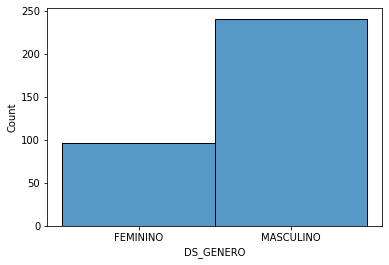

In [83]:
sns.histplot(data=data['DS_GENERO'])

<AxesSubplot:xlabel='DS_SIT_TOT_TURNO', ylabel='Count'>

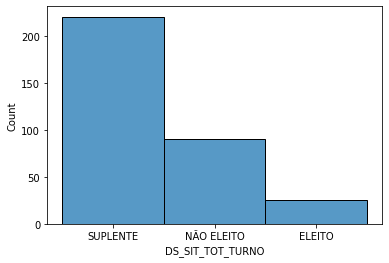

In [84]:
sns.histplot(data=data['DS_SIT_TOT_TURNO'])

## Sexo
Apenas pessoas do sexo masculino foram eleitas para vereador em Campos dos Goytacazes

<AxesSubplot:xlabel='DS_GENERO', ylabel='Count'>

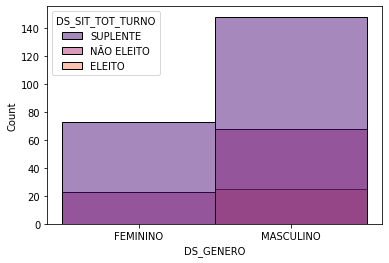

In [85]:
sns.histplot(data=data, x=data['DS_GENERO'], hue='DS_SIT_TOT_TURNO', palette='magma')


#### Idade

<AxesSubplot:xlabel='NR_IDADE_DATA_POSSE', ylabel='Count'>

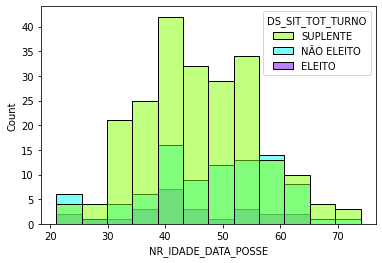

In [86]:
sns.histplot(data=data, x=data['NR_IDADE_DATA_POSSE'], hue='DS_SIT_TOT_TURNO', palette='hsv')


#### Despesas

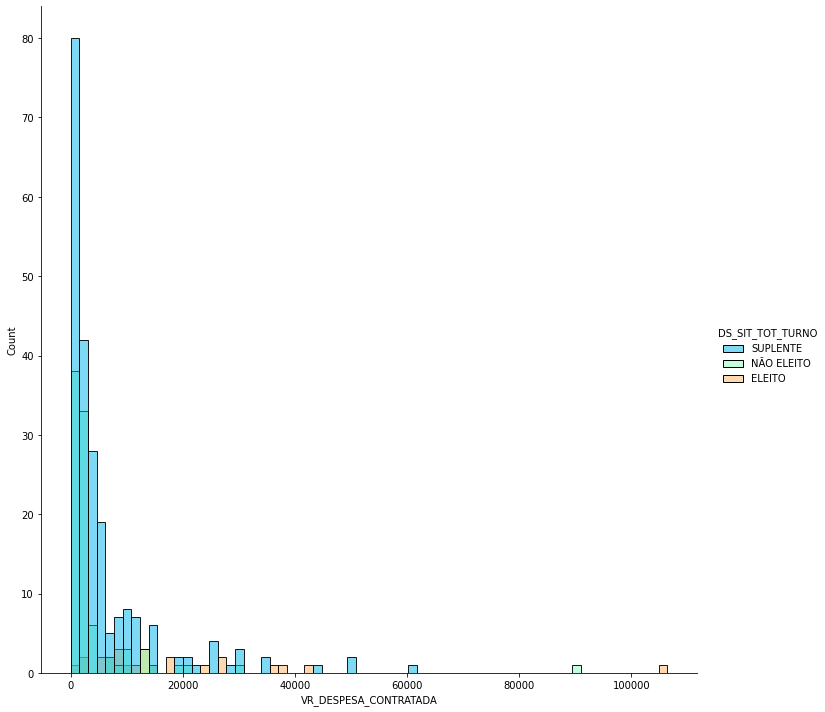

In [87]:
sns.displot(data=data, x=data['VR_DESPESA_CONTRATADA'], hue='DS_SIT_TOT_TURNO', palette='rainbow', height=10)


#### Receitas

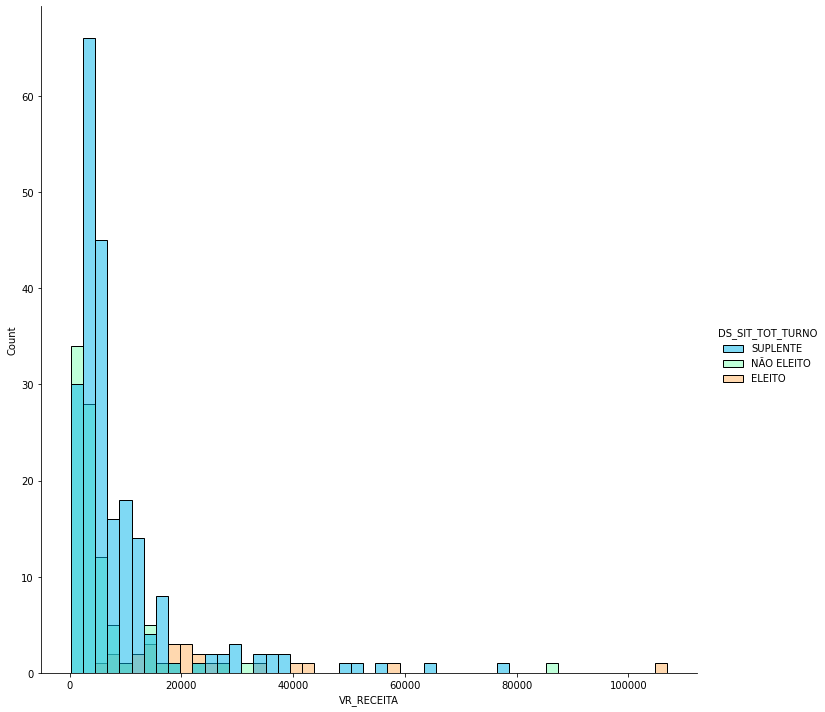

In [88]:
sns.displot(data=data, x=data['VR_RECEITA'], hue='DS_SIT_TOT_TURNO', palette='rainbow', height=10)


#### Escolaridade

<AxesSubplot:xlabel='Count', ylabel='DS_GRAU_INSTRUCAO'>

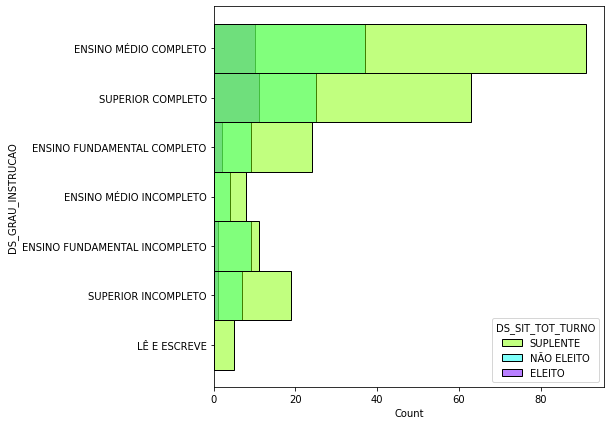

In [89]:
plt.figure(figsize=[7, 7])
sns.histplot(data=data, y=data['DS_GRAU_INSTRUCAO'], hue='DS_SIT_TOT_TURNO', palette='hsv')


#### Tom de pele

<AxesSubplot:xlabel='Count', ylabel='DS_COR_RACA'>

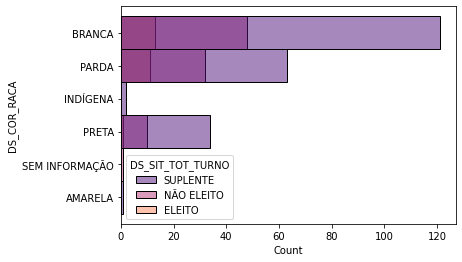

In [90]:
sns.histplot(data=data, y=data['DS_COR_RACA'], hue='DS_SIT_TOT_TURNO', palette='magma')


#### Estado Civil

<AxesSubplot:xlabel='Count', ylabel='DS_ESTADO_CIVIL'>

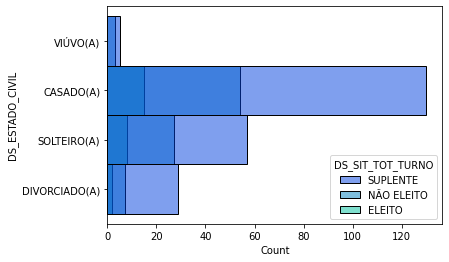

In [91]:
sns.histplot(data=data, y=data['DS_ESTADO_CIVIL'], hue='DS_SIT_TOT_TURNO', palette='winter')

#### Ocupação

<AxesSubplot:xlabel='Count', ylabel='DS_OCUPACAO'>

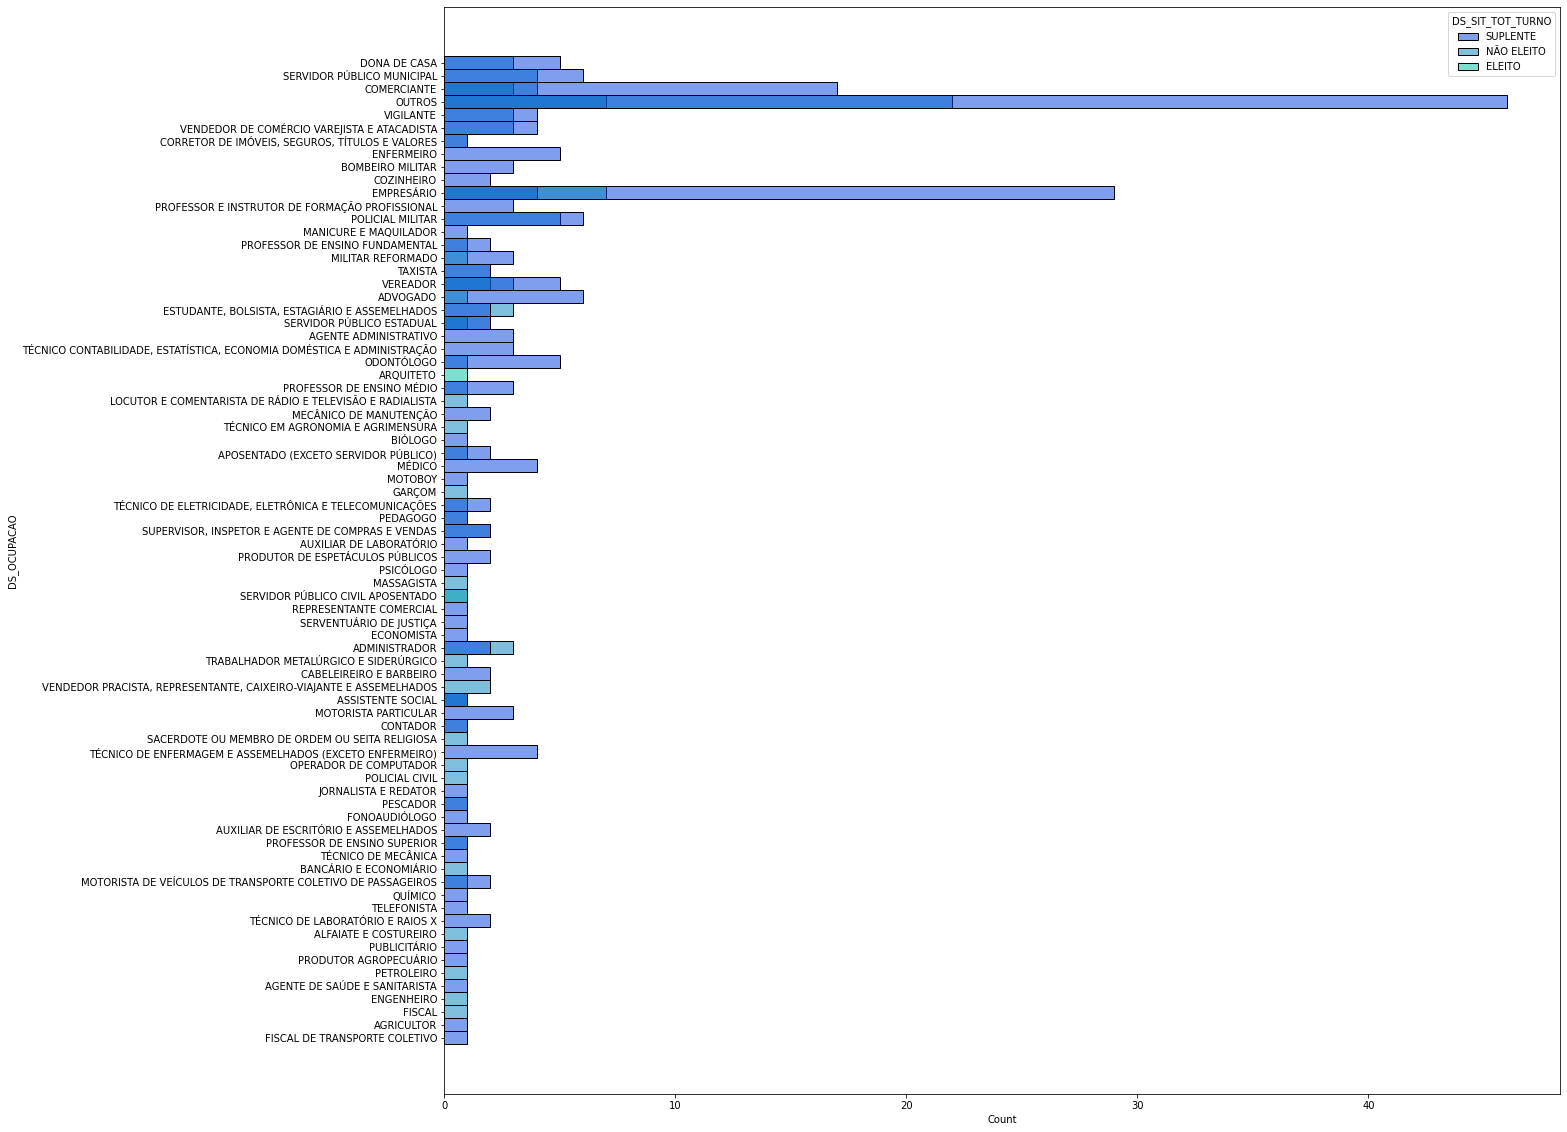

In [92]:
plt.figure(figsize=[20, 20])
sns.histplot(data=data, y=data['DS_OCUPACAO'], hue='DS_SIT_TOT_TURNO', palette='winter')


## 4: Preparação dos Dados

In [93]:
data.columns

Index(['SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO',
       'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'TP_AGREMIACAO',
       'NR_PARTIDO', 'NM_PARTIDO', 'DS_COMPOSICAO_COLIGACAO',
       'CD_NACIONALIDADE', 'NR_IDADE_DATA_POSSE', 'DS_GENERO',
       'DS_GRAU_INSTRUCAO', 'DS_ESTADO_CIVIL', 'DS_COR_RACA', 'DS_OCUPACAO',
       'DS_SIT_TOT_TURNO', 'VR_RECEITA', 'VR_DESPESA_CONTRATADA'],
      dtype='object')

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 337 entries, 0 to 336
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SG_UE                    337 non-null    int64  
 1   NM_UE                    337 non-null    object 
 2   CD_CARGO                 337 non-null    int64  
 3   DS_CARGO                 337 non-null    object 
 4   NR_CANDIDATO             337 non-null    int64  
 5   NM_CANDIDATO             337 non-null    object 
 6   NR_CPF_CANDIDATO         337 non-null    int64  
 7   NM_EMAIL                 337 non-null    object 
 8   TP_AGREMIACAO            337 non-null    object 
 9   NR_PARTIDO               337 non-null    int64  
 10  NM_PARTIDO               337 non-null    object 
 11  DS_COMPOSICAO_COLIGACAO  337 non-null    object 
 12  CD_NACIONALIDADE         337 non-null    int64  
 13  NR_IDADE_DATA_POSSE      337 non-null    int64  
 14  DS_GENERO                3

In [95]:
data.describe()

,SG_UE,CD_CARGO,NR_CANDIDATO,NR_CPF_CANDIDATO,NR_PARTIDO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,VR_RECEITA,VR_DESPESA_CONTRATADA
count,337.0,337.000000,337.000000,3.370000e+02,337.000000,337.000000,337.000000,337.000000,337.000000
mean,58190.0,12.997033,37880.937685,2.491488e+10,37.667656,1.002967,46.035608,9185.749852,6439.569377
std,0.0,0.054473,23244.657902,2.993513e+10,23.144781,0.054473,10.542653,12526.772433,11373.158236
min,58190.0,12.000000,45.000000,1.300148e+08,10.000000,1.000000,21.000000,187.500000,9.000000
25%,58190.0,13.000000,17444.000000,5.428702e+09,17.000000,1.000000,39.000000,2791.580000,995.000000
50%,58190.0,13.000000,28556.000000,1.018278e+10,28.000000,1.000000,46.000000,5149.700000,2610.000000
75%,58190.0,13.000000,55333.000000,4.191068e+10,55.000000,1.000000,55.000000,10467.600000,6380.350000
max,58190.0,13.000000,90999.000000,9.938322e+10,90.000000,2.000000,74.000000,107011.150000,106439.800000


In [96]:
data.head(3)

,SG_UE,NM_UE,CD_CARGO,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,NR_CPF_CANDIDATO,NM_EMAIL,TP_AGREMIACAO,NR_PARTIDO,...,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,55025,FRANÇOISE DA SILVA CIAFRINO,7072909702,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,55,...,1,55,FEMININO,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,DONA DE CASA,SUPLENTE,11701.38,10000.0
1,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,18777,FREDERICO HENRIQUE GONÇALVES,9034045757,FRED.CARMEM@GMAIL.COM,PARTIDO ISOLADO,18,...,1,39,MASCULINO,ENSINO MÉDIO COMPLETO,CASADO(A),BRANCA,SERVIDOR PÚBLICO MUNICIPAL,NÃO ELEITO,700.00,200.0
2,58190,CAMPOS DOS GOYTACAZES,13,VEREADOR,90333,THIAGO RANGEL LIMA,11729161790,ADVOCACIAELEITORAL2020@HOTMAIL.COM,PARTIDO ISOLADO,90,...,1,24,MASCULINO,SUPERIOR COMPLETO,SOLTEIRO(A),PARDA,COMERCIANTE,ELEITO,107011.15,106439.8


In [97]:
data.head(3).iloc[:, 9:13]

,NR_PARTIDO,NM_PARTIDO,DS_COMPOSICAO_COLIGACAO,CD_NACIONALIDADE
0,55,PARTIDO SOCIAL DEMOCRÁTICO,PSD,1
1,18,REDE SUSTENTABILIDADE,REDE,1
2,90,PARTIDO REPUBLICANO DA ORDEM SOCIAL,PROS,1


### A coluna `CD_NACIONALIDADE` também será levada em conta, mesmo só havendo 1 nacionalidade diferente

In [98]:
np.unique(data['CD_NACIONALIDADE'], return_counts=True)

(array([1, 2]), array([336,   1]))

### Definir as colunas a serem utilizadas para o valor de `X` e `Y`

In [99]:
columns_to_drop = [
  'SG_UE', 'NM_UE', 'CD_CARGO', 'DS_CARGO', 'NR_CANDIDATO', 'NM_CANDIDATO', 'NR_CPF_CANDIDATO', 'NM_EMAIL', 'TP_AGREMIACAO', 'NR_PARTIDO', 'DS_COMPOSICAO_COLIGACAO'
]

In [100]:
data.drop(columns=columns_to_drop, axis=1, inplace=True)
dataset = data.copy()
dataset.head(1)

,NM_PARTIDO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,PARTIDO SOCIAL DEMOCRÁTICO,1,55,FEMININO,ENSINO MÉDIO COMPLETO,VIÚVO(A),BRANCA,DONA DE CASA,SUPLENTE,11701.38,10000.0


### Usar o `LabelEncoder` para converter palavras para números, assim poderá ser treinado

In [102]:
label_encoders = LabelEncoder()
dataset.iloc[:, 0] = label_encoders.fit_transform(dataset.iloc[:, 0])

for i in range(3, 9):
    dataset.iloc[:, i] = label_encoders.fit_transform(dataset.iloc[:, i])


In [103]:
dataset.head(1)

,NM_PARTIDO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,15,1,55,0,2,3,1,19,2,11701.38,10000.0


### Utilizando o `MinMaxScaler` para normalizar todos os valores

In [104]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset[dataset.columns] = scaler.fit_transform(dataset[dataset.columns])


In [105]:
dataset.head(1)

,NM_PARTIDO,CD_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,VR_RECEITA,VR_DESPESA_CONTRATADA
0,0.6,0.0,0.641509,0.0,0.333333,1.0,0.2,0.253333,1.0,0.107784,0.093873


### Definindo o `X` e o `Y`

In [106]:
x_data = dataset.drop(columns='DS_SIT_TOT_TURNO', axis=1).values
x_data[0]

array([0.6       , 0.        , 0.64150943, 0.        , 0.33333333,
       1.        , 0.2       , 0.25333333, 0.107784  , 0.0938732 ])

In [107]:
y_data = dataset['DS_SIT_TOT_TURNO'].values
y_data

array([1. , 0.5, 0. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 1. , 0.5, 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. ,
       1. , 0.5, 1. , 1. , 1. , 0. , 1. , 1. , 1. , 1. , 0. , 0.5, 0. ,
       1. , 1. , 1. , 1. , 0.5, 1. , 0. , 0.5, 1. , 1. , 0.5, 0.5, 1. ,
       0.5, 0.5, 1. , 0.5, 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 0.5, 0.5,
       0. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 0.5, 1. , 0.5, 1. ,
       0.5, 1. , 1. , 1. , 1. , 0.5, 0.5, 1. , 0.5, 1. , 1. , 1. , 1. ,
       0. , 1. , 1. , 0.5, 0.5, 1. , 1. , 0.5, 1. , 1. , 0.5, 0.5, 1. ,
       1. , 0. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 0.5, 1. , 1. ,
       0.5, 1. , 0.5, 0. , 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 1. ,
       1. , 1. , 1. , 0.5, 0.5, 0.5, 1. , 0.5, 1. , 1. , 0.5, 1. , 0.5,
       1. , 0.5, 1. , 1. , 1. , 0. , 1. , 1. , 0.5, 1. , 0.5, 0.5, 0.5,
       1. , 0.5, 1. , 1. , 0.5, 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 1. ,
       0.5, 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1.

In [108]:
x_data.shape, y_data.shape

((337, 10), (337,))

## 5: Arquitetura da `Rede Neural Recorrente`


In [109]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0)

### Salvando variáveis de `Treino/Teste` e `Scaler`

In [110]:
with open(file='data/election_train_test_scaler.pkl', mode='wb') as f:
    pickle.dump([x_train, x_test, y_train, y_test, scaler], f)


### Checkpoint

In [111]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch:02d}-{loss:.4f}')
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_prefix, save_weights_only=True)

In [112]:
y_classes = len(np.unique(y_data))
rnn_units = 256

### Construindo o Modelo

In [56]:
def build_model(x_shape, y_classes, rnn_units):
  print(f'Entrada: {x_shape}')
  model = Sequential()
  model.add(LSTM(rnn_units, input_shape=(x_shape[-1], 1)))
  model.add(Dense(y_classes))
  model.add(Dense(1, activation='softmax'))
  model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
model = build_model(x_shape=x_data.shape, y_classes=y_classes, rnn_units=rnn_units)

Entrada: (337, 10)


2021-12-17 15:03:02.391481: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 15:03:02.488183: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 15:03:02.488403: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-17 15:03:02.488917: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dense (Dense)               (None, 3)                 771       
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 264,967
Trainable params: 264,967
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train.__class__, y_train.__class__, x_train[0].__class__, y_train[0].__class__

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.float64)

In [ ]:
x_train.shape, y_train.shape

((235, 10), (235,))

In [ ]:
x_test.shape, y_test.shape

((102, 10), (102,))

In [ ]:
%%time
model.fit(x_train, y_train, epochs=50, batch_size=1, verbose=2, callbacks=[checkpoint_callback])

Epoch 1/50


2021-12-17 15:03:05.382656: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8300


235/235 - 3s - loss: 0.1426 - accuracy: 0.6596 - 3s/epoch - 11ms/step
Epoch 2/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 573ms/epoch - 2ms/step
Epoch 3/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 831ms/epoch - 4ms/step
Epoch 4/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 707ms/epoch - 3ms/step
Epoch 5/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 726ms/epoch - 3ms/step
Epoch 6/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 719ms/epoch - 3ms/step
Epoch 7/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 706ms/epoch - 3ms/step
Epoch 8/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 764ms/epoch - 3ms/step
Epoch 9/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 705ms/epoch - 3ms/step
Epoch 10/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 676ms/epoch - 3ms/step
Epoch 11/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 650ms/epoch - 3ms/step
Epoch 12/50
235/235 - 1s - loss: 0.1426 - accuracy: 0.6596 - 707ms/epoch - 3ms/step
Epoch 13/50
23

### Restauração do Checkpoint

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)

'./training_checkpoints/ckpt_50-0.1426'

In [ ]:
model = build_model(x_shape=x_data.shape, y_classes=y_classes, rnn_units=rnn_units)
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))
model.build(tf.TensorShape([1, None]))

Entrada: (337, 10)


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dense_2 (Dense)             (None, 3)                 771       
                                                                 
 dense_3 (Dense)             (None, 1)                 4         
                                                                 
Total params: 264,967
Trainable params: 264,967
Non-trainable params: 0
_________________________________________________________________


## 6: Acurácia do modelo


In [ ]:
evaluation = model.evaluate(x_test, y_test)

4/4 [==============================] - 1s 3ms/step - loss: 0.1397 - accuracy: 0.6471


In [ ]:
evaluation

[0.13970588147640228, 0.6470588445663452]

## 7: Previsão de dados

In [ ]:
trainPrediction = model.predict(x_train)
testPrediction = model.predict(x_test)
testPrediction

testPrediction_norm = np.argmax(np.array(testPrediction), axis=1)
testPrediction_norm.shape, testPrediction_norm

((102,),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [ ]:
y_test.shape, y_test


((102,),
 array([1. , 0.5, 0.5, 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 0.5, 0.5, 1. ,
        0. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 1. ,
        1. , 0.5, 1. , 0.5, 0.5, 1. , 0. , 0. , 0.5, 1. , 0.5, 0.5, 1. ,
        1. , 1. , 1. , 0.5, 0.5, 1. , 0.5, 0.5, 1. , 1. , 0.5, 0.5, 1. ,
        0.5, 1. , 0.5, 0. , 1. , 1. , 1. , 1. , 0.5, 1. , 0.5, 0.5, 1. ,
        1. , 1. , 1. , 0.5, 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. , 1. ,
        1. , 1. , 0.5, 1. , 1. , 1. , 1. , 0. , 1. , 0. , 1. , 1. , 1. ,
        1. , 1. , 0. , 1. , 1. , 1. , 1. , 1. , 0.5, 1. , 1. ]))

In [ ]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[1:len(trainPrediction)+1, :] = trainPrediction


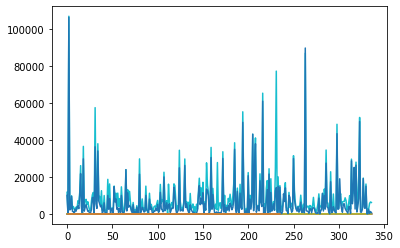

In [ ]:
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)

plt.show()


## Conclusão

Durante o processo de `fit` não houve nenhuma alteração entre os valores de `loss` e `accuracy`, isso pode ter sido causado por uma má gestão dos dados ou por ter viciado a rede durante seu treinamento.

Então na realidade não está fazendo previsão alguma, só está jogando o número 0 diversas vezes.

## 8: Layout do app Web
## 9: Resultado no App WEB
